<a href="https://colab.research.google.com/github/SayccBr/Python/blob/main/Predi%C3%A7%C3%A3o_de_Desempenho_Acad%C3%AAmico_usando_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Perfil Demográfico**

Index(['#', 'Descrição do Curso', 'Etnia/Raça', 'Forma de Ingresso',
       'Forma de Ingresso com Cota', 'I.R.A.', 'Sexo', 'Situação no Curso',
       'Situação no Período', 'Zona Residencial'],
      dtype='object')
<bound method NDFrame.head of            #                                 Descrição do Curso Etnia/Raça  \
0          1  Técnico em Informática Integrado ao Ensino Méd...          -   
1          2  Técnico em Mineração Integrado ao Ensino Médio...     Branca   
2          3  Técnico em Informática Integrado ao Ensino Méd...     Branca   
3          4  Técnico em Informática Integrado ao Ensino Méd...          -   
4          5  Técnico em Informática Integrado ao Ensino Méd...     Branca   
...      ...                                                ...        ...   
21072  21073  Técnico em Agropecuária Integrado ao Ensino Mé...          -   
21073  21074  Técnico em Informática Integrado ao Ensino Méd...          -   
21074  21075  Técnico em Informática para Internet

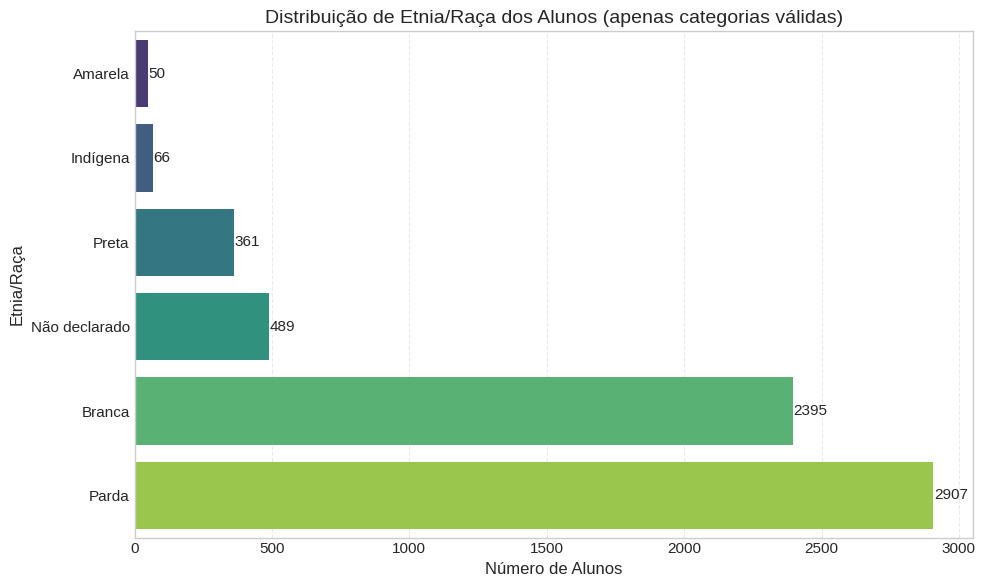

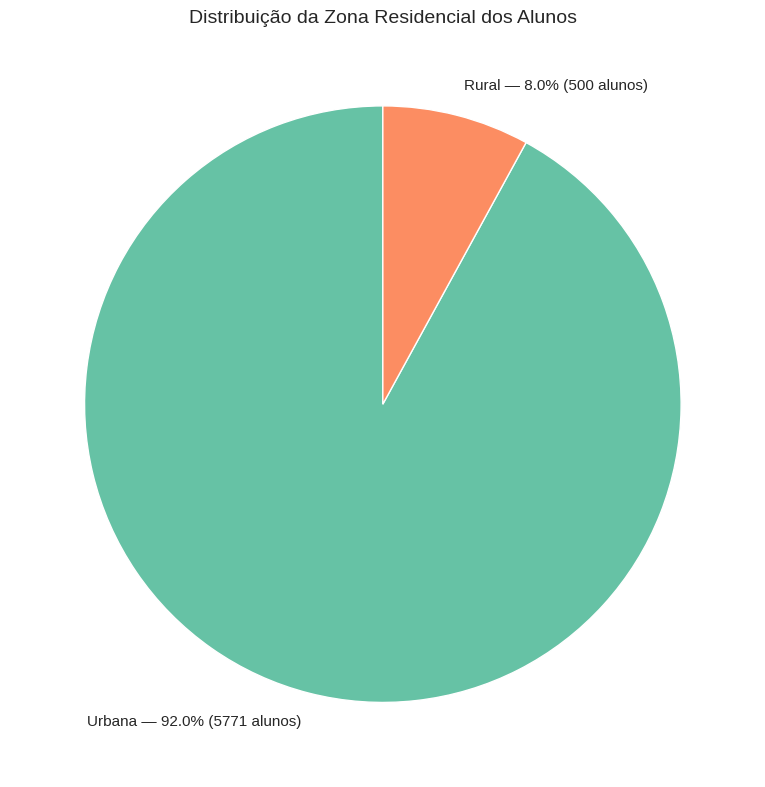

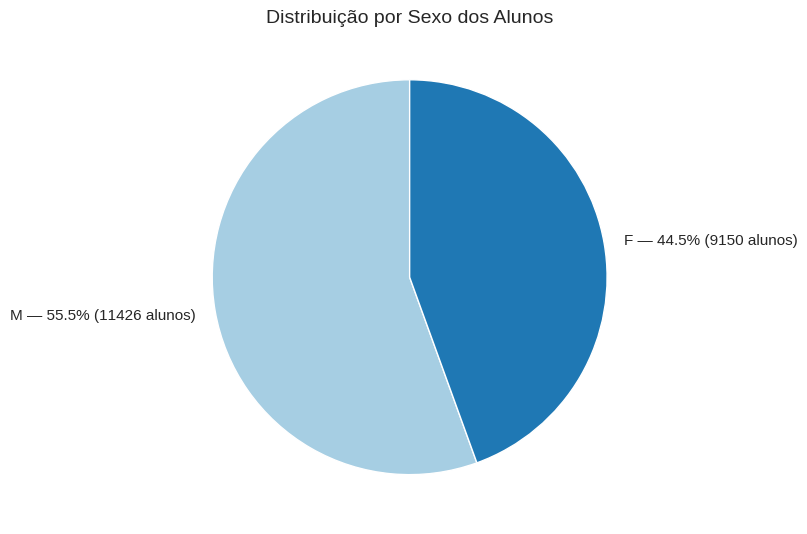

Distribuição da Forma de Ingresso com Cota (dados limpos):

                                                    Quantidade  Percentual (%)
Forma de Ingresso com Cota                                                    
RS - Candidatos de escola pública.                         159           33.76
RI-PPI - Candidatos de escola pública, com rend...         126           26.75
RI - Candidatos de escola pública, com renda fa...         111           23.57
RS-PPI - Candidatos de escola pública, com rend...          67           14.23
RI-PPI-PCD - Candidatos de escola pública, com ...           3            0.64
RI-PCD - Candidatos de escola pública, com rend...           2            0.42
RS-PPI-PCD - Candidatos de escola pública, com ...           2            0.42
RS-PCD - Candidatos de escola pública, com rend...           1            0.21 



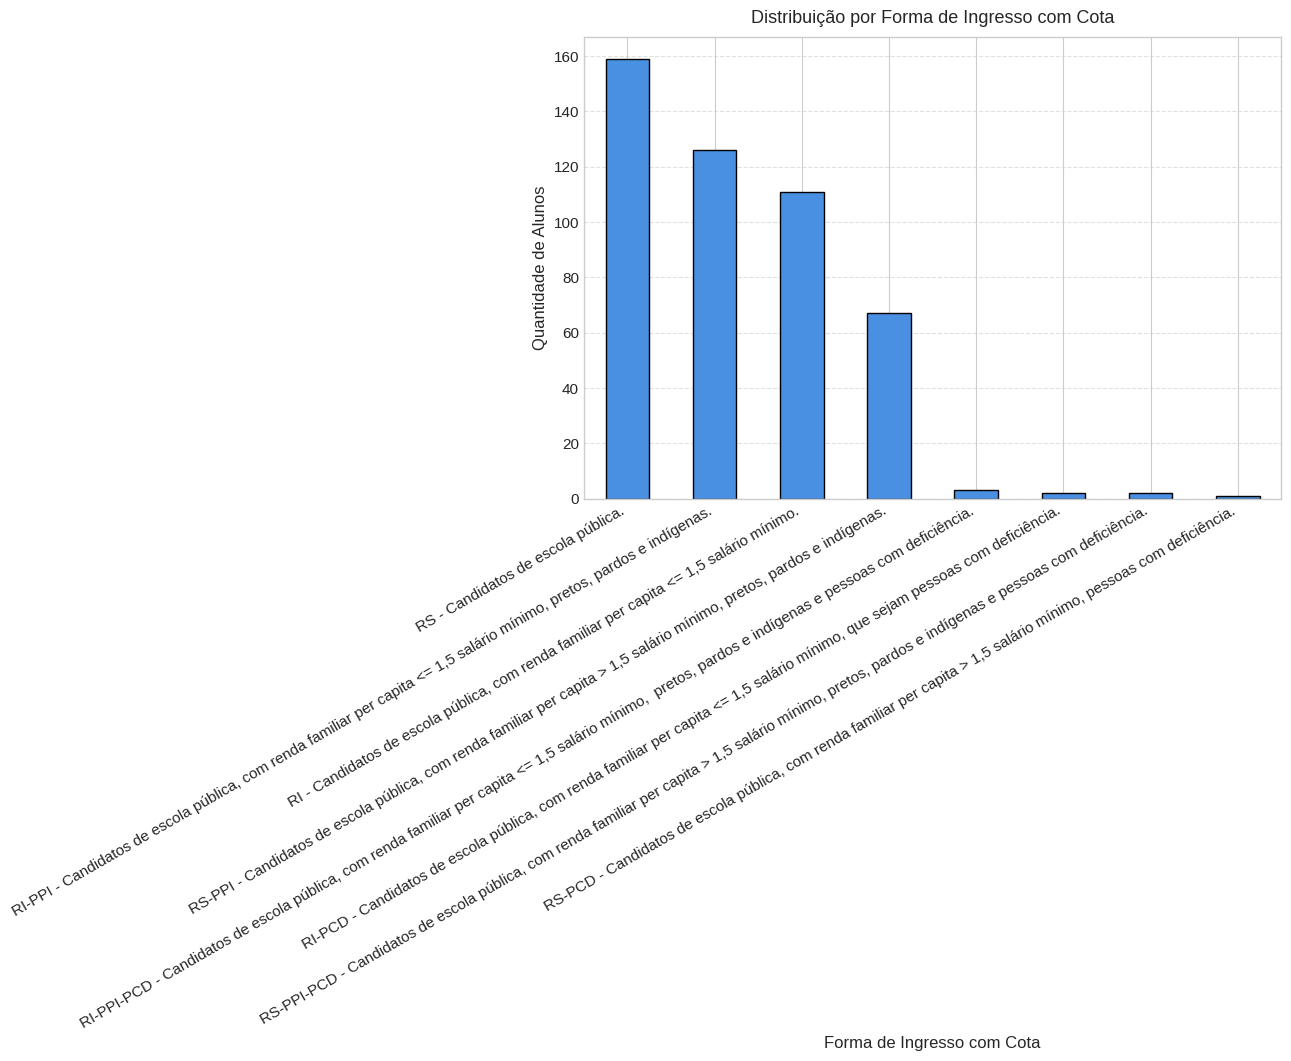

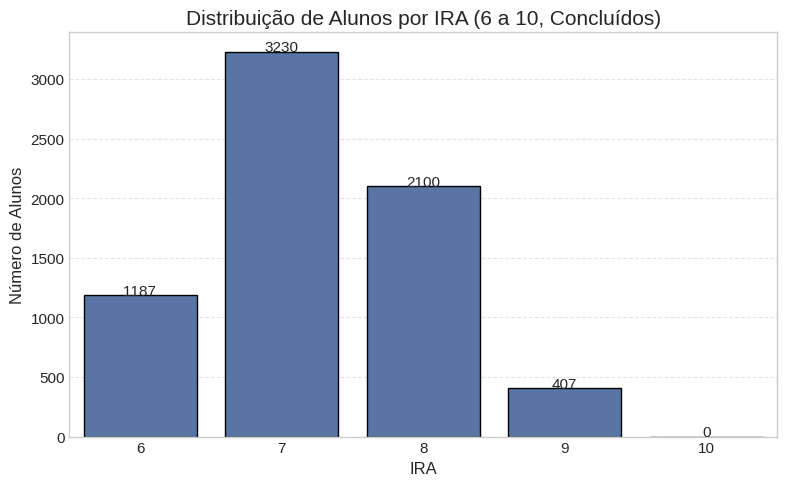

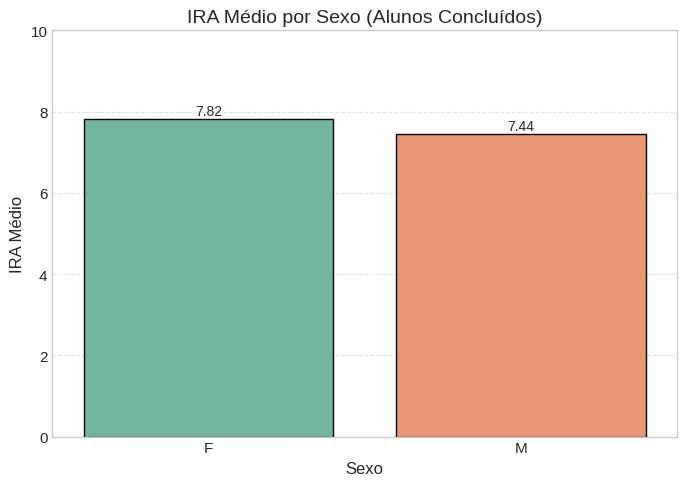

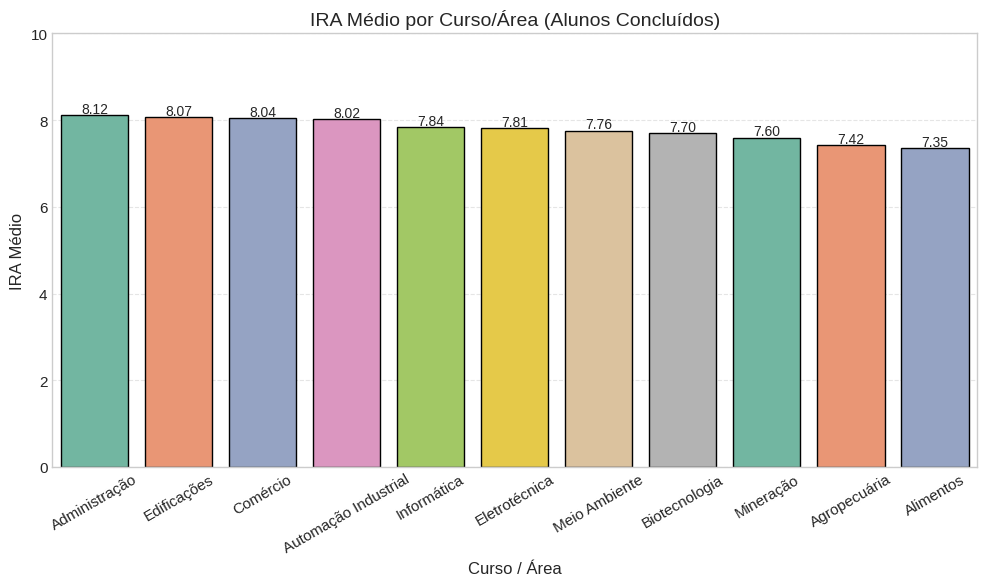

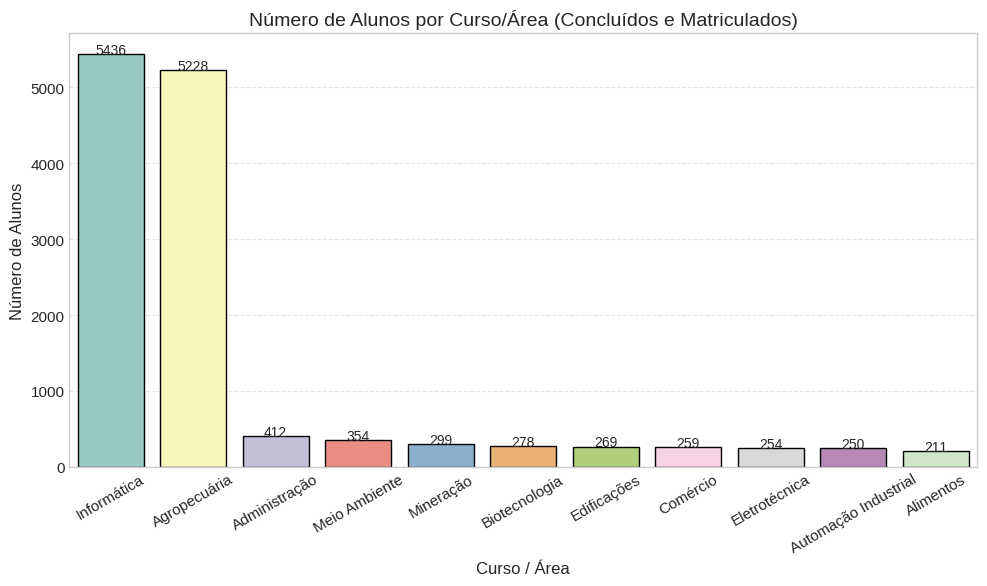

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# === Lê o arquivo Excel XLSX ===
df = pd.read_excel("Relatorio-IF.xlsx")

# === Remove colunas irrelevantes ===
df = df.drop(columns=['Campus', 'Renda Per Capita', 'Matrícula', 'Nome', 'Ano de Ingresso',
                      'Código Curso', 'Município de Residência (Código IBGE)', 'Ano de Conclusão'], errors='ignore')

print(df.columns)
print(df.head)

# === Filtrar alunos "Concluídos" ===
df_concluidos = df[df["Situação no Curso"].str.contains("Concluído", case=False, na=False)]

print("📊 Estatísticas do IRA - Alunos Concluídos:\n")
print(df_concluidos["I.R.A."].describe())

# ---------------------------------------------------
# ETNIA/RAÇA
# ---------------------------------------------------
df_etnia = df['Etnia/Raça'].astype(str).str.strip()
valores_invalidos = ['', '-', '.', 'nan', 'NaN', 'None']
df_etnia = df_etnia[~df_etnia.isin(valores_invalidos)]

etnia_counts = df_etnia.value_counts().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=etnia_counts.values, y=etnia_counts.index, palette='viridis')
plt.title('Distribuição de Etnia/Raça dos Alunos (apenas categorias válidas)', fontsize=14)
plt.xlabel('Número de Alunos')
plt.ylabel('Etnia/Raça')
for index, value in enumerate(etnia_counts.values):
    plt.text(value + 2, index, str(value), va='center')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# ---------------------------------------------------
# ZONA RESIDENCIAL
# ---------------------------------------------------
df_zona = df['Zona Residencial'].astype(str).str.strip()
valores_invalidos = ['', '-', '.', 'nan', 'NaN', 'None']
df_zona = df_zona[~df_zona.isin(valores_invalidos)]

zona_counts = df_zona.value_counts()
zona_percent = (zona_counts / zona_counts.sum()) * 100

labels = [f"{zona} — {perc:.1f}% ({count} alunos)"
          for zona, perc, count in zip(zona_percent.index, zona_percent, zona_counts)]

plt.figure(figsize=(8, 8))
plt.pie(zona_counts, labels=labels, startangle=90, colors=plt.cm.Set2.colors, wedgeprops={'edgecolor': 'white'})
plt.title('Distribuição da Zona Residencial dos Alunos', fontsize=14)
plt.tight_layout()
plt.show()

# ---------------------------------------------------
# SEXO
# ---------------------------------------------------
df_sexo = df['Sexo'].astype(str).str.strip().str.upper()
valores_invalidos = ['', '-', '.', 'nan', 'NaN', 'NONE', 'N']
df_sexo = df_sexo[~df_sexo.isin(valores_invalidos)]

sexo_counts = df_sexo.value_counts()
sexo_percent = (sexo_counts / sexo_counts.sum()) * 100

labels = [f"{sexo} — {perc:.1f}% ({count} alunos)"
          for sexo, perc, count in zip(sexo_percent.index, sexo_percent, sexo_counts)]

plt.figure(figsize=(8, 8))
plt.pie(sexo_counts, labels=labels, startangle=90, colors=plt.cm.Paired.colors, wedgeprops={'edgecolor': 'white'})
plt.title('Distribuição por Sexo dos Alunos', fontsize=14)
plt.tight_layout()
plt.show()

# ---------------------------------------------------
# FORMA DE INGRESSO COM COTA
# ---------------------------------------------------
coluna = "Forma de Ingresso com Cota"
df[coluna] = df[coluna].astype(str).str.strip()
valores_invalidos = ['-', 'nan', 'None', 'NaN', 'none', '']
df_limpo = df[~df[coluna].isin(valores_invalidos)]

contagem = df_limpo[coluna].value_counts()
percentual = df_limpo[coluna].value_counts(normalize=True) * 100
tabela = pd.DataFrame({"Quantidade": contagem, "Percentual (%)": percentual.round(2)})

print("Distribuição da Forma de Ingresso com Cota (dados limpos):\n")
print(tabela, "\n")

plt.figure(figsize=(9,6))
contagem.plot(kind='bar', color='#4A90E2', edgecolor='black')
plt.title("Distribuição por Forma de Ingresso com Cota", fontsize=13, pad=10)
plt.xlabel("Forma de Ingresso com Cota")
plt.ylabel("Quantidade de Alunos")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

# ---------------------------------------------------
# HISTOGRAMA DO IRA (faixas 6 a 10)
# ---------------------------------------------------
df_concluidos = df[df["Situação no Curso"].str.contains("Concluído", case=False, na=False)].copy()

# limpar IRA
df_concluidos['I.R.A.'] = (
    df_concluidos['I.R.A.']
    .astype(str).str.strip().str.replace(',', '.', regex=False)
)
df_concluidos['I.R.A.'] = pd.to_numeric(df_concluidos['I.R.A.'], errors='coerce')

# manter apenas IRA >= 6
df_concluidos = df_concluidos[(df_concluidos['I.R.A.'] >= 6) & (df_concluidos['I.R.A.'] <= 10)]

# binarizar em 6,7,8,9,10
bins = [6, 7, 8, 9, 10, 11]
labels = ["6", "7", "8", "9", "10"]

df_concluidos["IRA_faixa"] = pd.cut(
    df_concluidos["I.R.A."],
    bins=bins,
    labels=labels,
    right=False
)

faixa_counts = df_concluidos["IRA_faixa"].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.barplot(x=faixa_counts.index, y=faixa_counts.values, edgecolor="black")
for i, v in enumerate(faixa_counts.values):
    plt.text(i, v + 1, str(v), ha="center")

plt.title("Distribuição de Alunos por IRA (6 a 10, Concluídos)")
plt.xlabel("IRA")
plt.ylabel("Número de Alunos")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# ---------------------------------------------------
# IRA MÉDIO POR SEXO
# ---------------------------------------------------
df_concluidos = df[df["Situação no Curso"].str.contains("Concluído", case=False, na=False)].copy()
df_concluidos['I.R.A.'] = df_concluidos['I.R.A.'].astype(str).str.strip().str.replace(',', '.', regex=False)
df_concluidos['I.R.A.'] = df_concluidos['I.R.A.'].apply(lambda x: re.sub(r'[^0-9.]', '', x))
df_concluidos['I.R.A.'] = pd.to_numeric(df_concluidos['I.R.A.'], errors='coerce')
df_concluidos = df_concluidos[(df_concluidos['I.R.A.'] >= 0) & (df_concluidos['I.R.A.'] <= 10)]

df_concluidos['Sexo'] = df_concluidos['Sexo'].astype(str).str.strip().str.upper()
valores_invalidos = ['', '-', '.', 'NAN', 'NONE', 'NA', 'N', 'NaN', 'None']
df_concluidos = df_concluidos[~df_concluidos['Sexo'].isin(valores_invalidos)]

ira_medio_sexo = df_concluidos.groupby('Sexo')['I.R.A.'].mean().sort_values(ascending=False)

plt.figure(figsize=(7,5))
sns.barplot(x=ira_medio_sexo.index, y=ira_medio_sexo.values, palette='Set2', edgecolor='black')
for i, v in enumerate(ira_medio_sexo.values):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center', fontsize=10)
plt.title("IRA Médio por Sexo (Alunos Concluídos)", fontsize=14)
plt.xlabel("Sexo")
plt.ylabel("IRA Médio")
plt.ylim(0, 10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ---------------------------------------------------
# IRA MÉDIO POR CURSO/ÁREA (sem Ensino Médio)
# ---------------------------------------------------
def agrupar_curso(curso):
    curso = str(curso).lower()

    # Informática unificada
    if ("informática" in curso or
        "sistemas" in curso or
        "desenvolvimento" in curso or
        "rede" in curso or
        "computadores" in curso or
        "suporte" in curso or
        "manutenção" in curso):

        return "Informática"

    elif "agro" in curso:
        return "Agropecuária"
    elif "alimentos" in curso:
        return "Alimentos"
    elif "administração" in curso:
        return "Administração"
    elif "eletrotécnica" in curso:
        return "Eletrotécnica"
    elif "mineração" in curso:
        return "Mineração"
    elif "comércio" in curso:
        return "Comércio"
    elif "biotecnologia" in curso:
        return "Biotecnologia"
    elif "meio ambiente" in curso:
        return "Meio Ambiente"
    elif "edificações" in curso:
        return "Edificações"
    elif "automação" in curso:
        return "Automação Industrial"
    elif "ensino médio" in curso:
        return None  # remover
    else:
        return "Outros"


df_concluidos['Curso_Area'] = df_concluidos['Descrição do Curso'].apply(agrupar_curso)
df_concluidos = df_concluidos.dropna(subset=['Curso_Area'])

ira_medio_area = df_concluidos.groupby('Curso_Area')['I.R.A.'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=ira_medio_area.index, y=ira_medio_area.values, palette='Set2', edgecolor='black')
for i, v in enumerate(ira_medio_area.values):
    plt.text(i, v + 0.05, f"{v:.2f}", ha='center', fontsize=10)
plt.title("IRA Médio por Curso/Área (Alunos Concluídos)", fontsize=14)
plt.xlabel("Curso / Área")
plt.ylabel("IRA Médio")
plt.xticks(rotation=30)
plt.ylim(0, 10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ---------------------------------------------------
# NÚMERO DE ALUNOS POR CURSO/ÁREA (sem Ensino Médio)
# ---------------------------------------------------
df_concluidos = df[df["Situação no Curso"].str.contains("Concluído|Matriculado", case=False, na=False)].copy()
df_concluidos['Curso_Area'] = df_concluidos['Descrição do Curso'].apply(agrupar_curso)
df_concluidos = df_concluidos.dropna(subset=['Curso_Area'])

contagem_cursos = df_concluidos['Curso_Area'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=contagem_cursos.index, y=contagem_cursos.values, palette='Set3', edgecolor='black')
for i, v in enumerate(contagem_cursos.values):
    plt.text(i, v + 1, str(v), ha='center', fontsize=10)
plt.title("Número de Alunos por Curso/Área (Concluídos e Matriculados)", fontsize=14)
plt.xlabel("Curso / Área")
plt.ylabel("Número de Alunos")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Modelagem com machine learning

### Subtask:
Implementar o algoritmo candidato (Logistic Regression) e Avaliar-lo.


/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


Dados limpos: 6255 registros
Distribuição Cota: {0: 5784, 1: 471}
Distribuição Evasão: {0: 4921, 1: 1334}
Distribuição IRA Alto: {0: 4022, 1: 2233}

Avaliação Evasão - Regressão Logística:
Acurácia: 0.714 | Precisão: 0.404 | Recall: 0.715 | F1-score: 0.516
Matriz de Confusão:
 [[702 282]
 [ 76 191]]


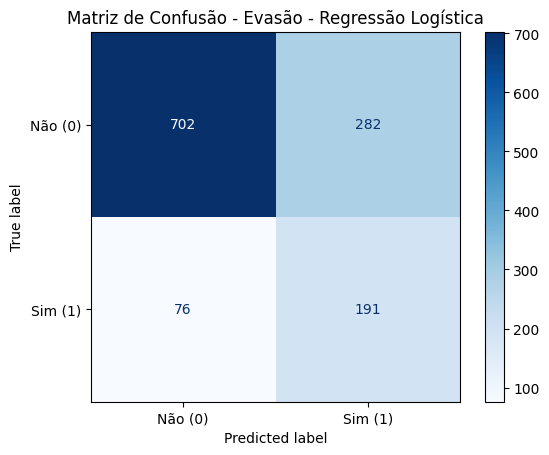


Avaliação Evasão - Random Forest:
Acurácia: 0.717 | Precisão: 0.411 | Recall: 0.757 | F1-score: 0.533
Matriz de Confusão:
 [[695 289]
 [ 65 202]]


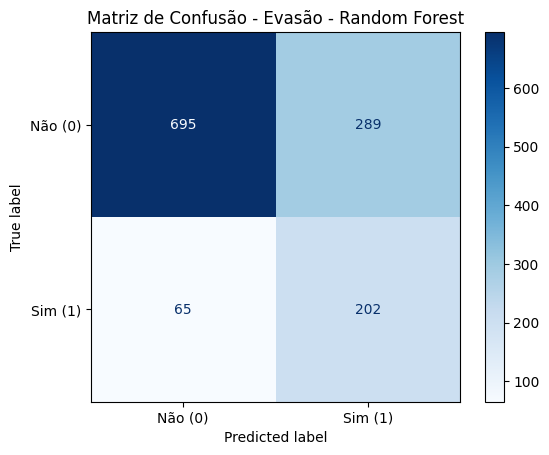

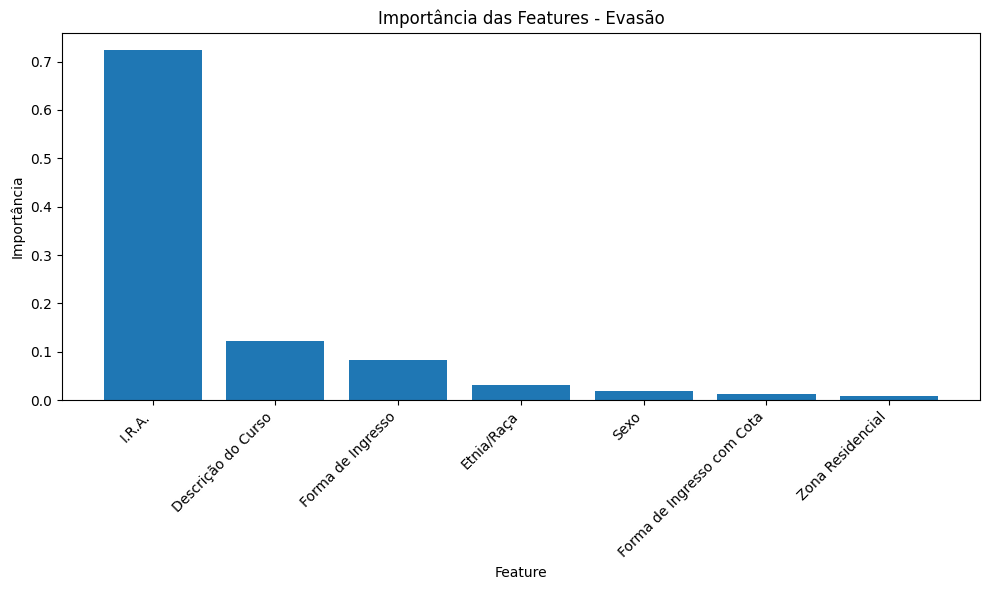


Top 5 Features Mais Importantes - Evasão:
  1. I.R.A.: 0.7232
  2. Descrição do Curso: 0.1215
  3. Forma de Ingresso: 0.0837
  4. Etnia/Raça: 0.0305
  5. Sexo: 0.0195

Avaliação IRA Alto - Regressão Logística:
Acurácia: 0.551 | Precisão: 0.409 | Recall: 0.575 | F1-score: 0.478
Matriz de Confusão:
 [[432 372]
 [190 257]]


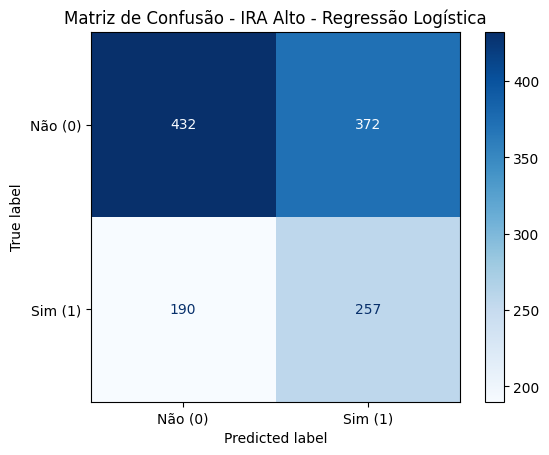


Avaliação IRA Alto - Random Forest:
Acurácia: 0.675 | Precisão: 0.536 | Recall: 0.682 | F1-score: 0.600
Matriz de Confusão:
 [[540 264]
 [142 305]]


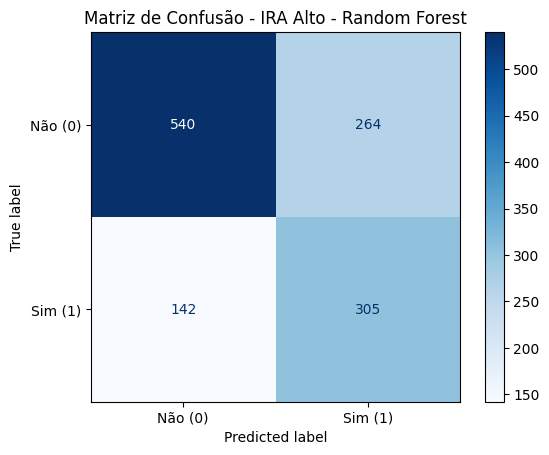

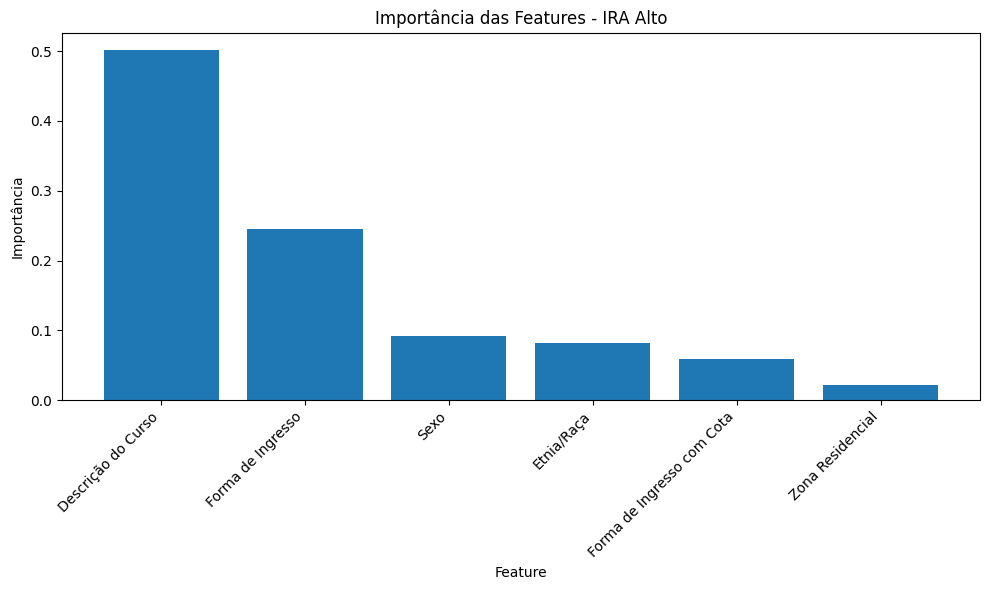


Top 5 Features Mais Importantes - IRA Alto:
  1. Descrição do Curso: 0.5011
  2. Forma de Ingresso: 0.2447
  3. Sexo: 0.0922
  4. Etnia/Raça: 0.0813
  5. Forma de Ingresso com Cota: 0.0590


In [31]:
# ---------------------- IMPORTS ----------------------
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

# ---------------------- FUNÇÃO DE AVALIAÇÃO ----------------------
def avaliar_modelo(y_true, y_pred, nome_modelo="Modelo"):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    cm = confusion_matrix(y_true, y_pred)

    print(f"\nAvaliação {nome_modelo}:")
    print(f"Acurácia: {acc:.3f} | Precisão: {prec:.3f} | Recall: {rec:.3f} | F1-score: {f1:.3f}")
    print("Matriz de Confusão:\n", cm)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Não (0)","Sim (1)"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Matriz de Confusão - {nome_modelo}")
    plt.show()

# ---------------------- FUNÇÃO DE IMPORTÂNCIA DE FEATURES ----------------------
def plot_feature_importance(model, feature_names, nome_modelo):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title(f"Importância das Features - {nome_modelo}")
    plt.bar(range(len(importances)), importances[indices], align="center")
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45, ha='right')
    plt.xlabel("Feature")
    plt.ylabel("Importância")
    plt.tight_layout()
    plt.show()

    print(f"\nTop 5 Features Mais Importantes - {nome_modelo}:")
    for i in range(min(5, len(importances))):
        print(f"  {i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

# ---------------------- 1️⃣ CARREGAR E LIMPAR DADOS ----------------------
df = pd.read_excel("Relatorio-IF.xlsx")

# Remove colunas irrelevantes
df = df.drop(columns=['Campus', 'Renda Per Capita', 'Matrícula', 'Nome', 'Ano de Ingresso',
                      'Código Curso', 'Município de Residência (Código IBGE)', 'Ano de Conclusão'], errors='ignore')

df_ml = df[df["Situação no Curso"].notna()].copy()

# ------------- Limpeza -------------
valores_invalidos = ['', '-', '.', 'NAN', 'NONE', 'NA', 'N', 'NaN', 'None']

# Sexo
if "Sexo" in df_ml.columns:
    df_ml['Sexo'] = df_ml['Sexo'].astype(str).str.strip().str.upper()
    df_ml = df_ml[~df_ml['Sexo'].isin(valores_invalidos)]

# Zona Residencial
if "Zona Residencial" in df_ml.columns:
    df_ml['Zona Residencial'] = df_ml['Zona Residencial'].astype(str).str.strip().str.upper()
    df_ml = df_ml[~df_ml['Zona Residencial'].isin(valores_invalidos)]

# I.R.A.
df_ml["I.R.A."] = df_ml["I.R.A."].astype(str).str.replace(",", ".", regex=False)
df_ml["I.R.A."] = pd.to_numeric(df_ml["I.R.A."], errors="coerce")
df_ml = df_ml[df_ml["I.R.A."].notna()]
df_ml = df_ml[(df_ml["I.R.A."] >= 0) & (df_ml["I.R.A."] <= 10)]

# Cria Target EVASÃO
evasao_labels = ['Cancelado', 'Cancelamento Compulsório', 'Cancelamento por Desligamento', 'Cancelamento por Duplicidade', 'Evasão',
                  'Jubilado', 'Matrícula Vínculo Institucional', 'Trancado Voluntariamente', 'Transferido Externo', 'Transferido Interno']
df_ml["Evasao"] = df_ml["Situação no Curso"].apply(
    lambda x: 1 if any(label in str(x) for label in evasao_labels) else 0
)

# Cria Target IRA ALTO
df_ml["IRA_alto"] = (df_ml["I.R.A."] >= 7.5).astype(int)

# Cria Target COTA
if "Forma de Ingresso com Cota" in df_ml.columns:
    df_ml['Forma de Ingresso com Cota'] = df_ml['Forma de Ingresso com Cota'].astype(str).str.strip()
    df_ml["Cota"] = (df_ml['Forma de Ingresso com Cota'] != "-").astype(int)

# Resumo
print(f"Dados limpos: {len(df_ml)} registros")
print(f"Distribuição Cota: {df_ml['Cota'].value_counts().to_dict()}")
print(f"Distribuição Evasão: {df_ml['Evasao'].value_counts().to_dict()}")
print(f"Distribuição IRA Alto: {df_ml['IRA_alto'].value_counts().to_dict()}")

# ---------------------- 2️⃣ MODELO EVASÃO ----------------------
features_ev = ["Sexo", "Zona Residencial", "Forma de Ingresso com Cota",
               "Etnia/Raça", "Descrição do Curso", "I.R.A.", "Forma de Ingresso"]
target_ev = "Evasao"

# Codificação
le_ev = {col: LabelEncoder() for col in features_ev}
for col in features_ev:
    df_ml[col + "_enc"] = le_ev[col].fit_transform(df_ml[col].astype(str))

X_ev = df_ml[[col + "_enc" for col in features_ev]]
y_ev = df_ml[target_ev]

X_train_ev, X_test_ev, y_train_ev, y_test_ev = train_test_split(
    X_ev, y_ev, test_size=0.2, random_state=42, stratify=y_ev
)

# --- Regressão Logística (Evasão) ---
model_lr_ev = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
model_lr_ev.fit(X_train_ev, y_train_ev)
y_pred_lr_ev = model_lr_ev.predict(X_test_ev)
avaliar_modelo(y_test_ev, y_pred_lr_ev, "Evasão - Regressão Logística")

# --- RANDOM FOREST (Evasão) ---
model_rf_ev = RandomForestClassifier(
    n_estimators=300,           # 300 árvores = robusto
    class_weight='balanced',
    random_state=42,
    max_depth=10,               # evita overfitting
    min_samples_split=10,
    min_samples_leaf=5,
    n_jobs=-1                   # usa todos os núcleos do PC
)
model_rf_ev.fit(X_train_ev, y_train_ev)
y_pred_rf_ev = model_rf_ev.predict(X_test_ev)
avaliar_modelo(y_test_ev, y_pred_rf_ev, "Evasão - Random Forest")

# --- Importância das Features ---
plot_feature_importance(model_rf_ev, features_ev, "Evasão")

# ---------------------- 3️⃣ MODELO I.R.A. ALTO ----------------------
features_ira = ["Sexo", "Zona Residencial", "Forma de Ingresso com Cota",
                "Etnia/Raça", "Descrição do Curso", "Forma de Ingresso"]

target_ira = "IRA_alto"

le_ira = {col: LabelEncoder() for col in features_ira}
for col in features_ira:
    df_ml[col + "_enc_ira"] = le_ira[col].fit_transform(df_ml[col].astype(str))

X_ira = df_ml[[col + "_enc_ira" for col in features_ira]]
y_ira = df_ml[target_ira]

X_train_ira, X_test_ira, y_train_ira, y_test_ira = train_test_split(
    X_ira, y_ira, test_size=0.2, random_state=42, stratify=y_ira
)

# --- Regressão Logística (IRA Alto) ---
model_lr_ira = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
model_lr_ira.fit(X_train_ira, y_train_ira)
y_pred_lr_ira = model_lr_ira.predict(X_test_ira)
avaliar_modelo(y_test_ira, y_pred_lr_ira, "IRA Alto - Regressão Logística")

# --- RANDOM FOREST (IRA Alto) ---
model_rf_ira = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',
    random_state=42,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    n_jobs=-1
)
model_rf_ira.fit(X_train_ira, y_train_ira)
y_pred_rf_ira = model_rf_ira.predict(X_test_ira)
avaliar_modelo(y_test_ira, y_pred_rf_ira, "IRA Alto - Random Forest")

# --- Importância das Features ---
plot_feature_importance(model_rf_ira, features_ira, "IRA Alto")

## PREDIÇÃO INTERATIVA

### Subtask:
PREDIÇÃO INTERATIVA


In [32]:
# ---------------------- 4️⃣ PREDIÇÃO DIRETA (FINAL & INTERPRETÁVEL) ----------------------
print("\n" + "═" * 80)
print("           PREDIÇÃO DIRETA - RANDOM FOREST (MELHOR MODELO)")
print("═" * 80)

# === DADOS DO ALUNO (MUDE AQUI QUANDO QUISER) ===
aluno = {
    "Sexo": "M",
    "Zona Residencial": "RURAL",
    "Forma de Ingresso com Cota": "RS-PPI - Candidatos de escola pública, com renda familiar per capita > 1,5 salário mínimo, pretos, pardos e indígenas.",
    "Etnia/Raça": "Preta",
    "Descrição do Curso": "Técnico em Informática Integrado ao Ensino Médio - Catalão",
    "I.R.A.": 5.3,
    "Forma de Ingresso": "L2 - Candidato com renda familiar bruta per capita igual ou inferior a 1,5 salário-mínimo, autodeclarados pretos, pardos ou indígenas e que tenha estudado integralmente o ensino fundamental/médio em escolas públicas.",
    "Situação no Curso": "Matriculado"
}

print("\nAluno selecionado:")
for k, v in aluno.items():
    print(f"  {k}: {v}")
print()

# === CODIFICAÇÃO SEGURA ===
def encode_value(val, le, col_name):
    try:
        return le.transform([val])[0]
    except ValueError:
        moda = df_ml[col_name].mode()
        moda_val = moda.iloc[0] if len(moda) > 0 else list(le.classes_)[0]
        print(f"Valor inválido em '{col_name}': '{val}' → usando moda: '{moda_val}'")
        return le.transform([moda_val])[0]

# --- Codificação ---
sexo_enc   = encode_value(aluno["Sexo"], le_ev["Sexo"], "Sexo")
zona_enc   = encode_value(aluno["Zona Residencial"], le_ev["Zona Residencial"], "Zona Residencial")
cota_enc   = encode_value(aluno["Forma de Ingresso com Cota"], le_ev["Forma de Ingresso com Cota"], "Forma de Ingresso com Cota")
etnia_enc  = encode_value(aluno["Etnia/Raça"], le_ev["Etnia/Raça"], "Etnia/Raça")
curso_enc  = encode_value(aluno["Descrição do Curso"], le_ev["Descrição do Curso"], "Descrição do Curso")
forma_enc  = encode_value(aluno["Forma de Ingresso"], le_ev["Forma de Ingresso"], "Forma de Ingresso")
ira_val    = aluno["I.R.A."]

# --- Entrada ---
X_ev_input  = np.array([[sexo_enc, zona_enc, cota_enc, etnia_enc, curso_enc, ira_val, forma_enc]])
X_ira_input = np.array([[sexo_enc, zona_enc, cota_enc, etnia_enc, curso_enc, forma_enc]])

# === PREDIÇÃO (SEM AVISOS) ===
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    prob_evasao = model_rf_ev.predict_proba(X_ev_input)[0, 1]
    pred_evasao = model_rf_ev.predict(X_ev_input)[0]
    prob_ira    = model_rf_ira.predict_proba(X_ira_input)[0, 1]
    pred_ira    = model_rf_ira.predict(X_ira_input)[0]

# === RESULTADO FINAL ===
curso_resumo = aluno["Descrição do Curso"][:40] + "..." if len(aluno["Descrição do Curso"]) > 40 else aluno["Descrição do Curso"]

print("\n" + "═" * 70)
print("                    RESULTADO DA PREDIÇÃO")
print("═" * 70)
print(f"Aluno: {aluno['Sexo']} | {curso_resumo}")
print(f"I.R.A. atual: {ira_val:.2f} | Situação: {aluno['Situação no Curso']}")
print()
print(f"Risco de Evasão:     ", end="")
print(f"{'ALTO' if pred_evasao else 'BAIXO'} → {prob_evasao:.1%}".rjust(20))
print(f"I.R.A Alto: ", end="")
print(f"{'ALTO' if pred_ira else 'BAIXO'} → {prob_ira:.1%}".rjust(20))
print("═" * 70)

# === AÇÃO INTELIGENTE ===
if pred_evasao and pred_ira:
    print("INTERVENÇÃO ESTRATÉGICA: Aluno com alto potencial, mas em crise urgente!")
    print("→ Acompanhamento pedagógico + mentoria + bolsa de apoio imediata.")
elif pred_evasao:
    print("AÇÃO: Acompanhamento pedagógico urgente!")
    print("→ Reforço escolar, tutor, redução de carga horária.")
elif pred_ira:
    print("POTENCIAL: Candidato a bolsas e programas de excelência!")
    print("→ Indicar para monitoria, iniciação científica, olimpíadas.")
else:
    print("SITUAÇÃO ESTÁVEL: Monitorar desempenho regularmente.")

print("═" * 70)
print("Etnia/Raça únicas:", sorted(df_ml["Situação no Curso"].unique()))



════════════════════════════════════════════════════════════════════════════════
           PREDIÇÃO DIRETA - RANDOM FOREST (MELHOR MODELO)
════════════════════════════════════════════════════════════════════════════════

Aluno selecionado:
  Sexo: M
  Zona Residencial: RURAL
  Forma de Ingresso com Cota: RS-PPI - Candidatos de escola pública, com renda familiar per capita > 1,5 salário mínimo, pretos, pardos e indígenas.
  Etnia/Raça: Preta
  Descrição do Curso: Técnico em Informática Integrado ao Ensino Médio - Catalão
  I.R.A.: 5.3
  Forma de Ingresso: L2 - Candidato com renda familiar bruta per capita igual ou inferior a 1,5 salário-mínimo, autodeclarados pretos, pardos ou indígenas e que tenha estudado integralmente o ensino fundamental/médio em escolas públicas.
  Situação no Curso: Matriculado


══════════════════════════════════════════════════════════════════════
                    RESULTADO DA PREDIÇÃO
══════════════════════════════════════════════════════════════════════
A

## ANÁLISE EXPLORATÓRIA DE FEATURES

### Subtask:
TESTE


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# =====================================================
# 📊 ANÁLISE EXPLORATÓRIA DE FEATURES
# =====================================================

# Assume que df_ml já está carregado e limpo

print("="*60)
print("📊 ANÁLISE DE CORRELAÇÃO COM EVASÃO")
print("="*60)

# 1️⃣ Taxa de Evasão por CURSO
print("\n1️⃣ Taxa de Evasão por Curso:")
evasao_curso = df_ml.groupby("Descrição do Curso")["Evasao"].agg(['mean', 'count']).sort_values('mean', ascending=False)
evasao_curso.columns = ['Taxa_Evasao', 'Total_Alunos']
evasao_curso['Taxa_Evasao'] = (evasao_curso['Taxa_Evasao'] * 100).round(2)
print(evasao_curso.head(10))

# 2️⃣ Taxa de Evasão por ETNIA/RAÇA
print("\n2️⃣ Taxa de Evasão por Etnia/Raça:")
evasao_etnia = df_ml.groupby("Etnia/Raça")["Evasao"].agg(['mean', 'count']).sort_values('mean', ascending=False)
evasao_etnia.columns = ['Taxa_Evasao', 'Total_Alunos']
evasao_etnia['Taxa_Evasao'] = (evasao_etnia['Taxa_Evasao'] * 100).round(2)
print(evasao_etnia)

# 3️⃣ Taxa de Evasão por FORMA DE INGRESSO
print("\n3️⃣ Taxa de Evasão por Forma de Ingresso:")
evasao_ingresso = df_ml.groupby("Forma de Ingresso")["Evasao"].agg(['mean', 'count']).sort_values('mean', ascending=False)
evasao_ingresso.columns = ['Taxa_Evasao', 'Total_Alunos']
evasao_ingresso['Taxa_Evasao'] = (evasao_ingresso['Taxa_Evasao'] * 100).round(2)
print(evasao_ingresso.head(10))

# 4️⃣ Taxa de Evasão por SEXO
print("\n4️⃣ Taxa de Evasão por Sexo:")
evasao_sexo = df_ml.groupby("Sexo")["Evasao"].agg(['mean', 'count']).sort_values('mean', ascending=False)
evasao_sexo.columns = ['Taxa_Evasao', 'Total_Alunos']
evasao_sexo['Taxa_Evasao'] = (evasao_sexo['Taxa_Evasao'] * 100).round(2)
print(evasao_sexo)

# 5️⃣ Taxa de Evasão por ZONA RESIDENCIAL
print("\n5️⃣ Taxa de Evasão por Zona Residencial:")
evasao_zona = df_ml.groupby("Zona Residencial")["Evasao"].agg(['mean', 'count']).sort_values('mean', ascending=False)
evasao_zona.columns = ['Taxa_Evasao', 'Total_Alunos']
evasao_zona['Taxa_Evasao'] = (evasao_zona['Taxa_Evasao'] * 100).round(2)
print(evasao_zona)

# 6️⃣ Taxa de Evasão por COTA
print("\n6️⃣ Taxa de Evasão por Cota:")
evasao_cota = df_ml.groupby("Cota")["Evasao"].agg(['mean', 'count']).sort_values('mean', ascending=False)
evasao_cota.columns = ['Taxa_Evasao', 'Total_Alunos']
evasao_cota['Taxa_Evasao'] = (evasao_cota['Taxa_Evasao'] * 100).round(2)
evasao_cota.index = ['Com Cota', 'Sem Cota']
print(evasao_cota)

print("\n" + "="*60)
print("🎓 ANÁLISE DE CORRELAÇÃO COM IRA ALTO")
print("="*60)

# 7️⃣ Taxa de IRA Alto por CURSO
print("\n7️⃣ Taxa de IRA Alto por Curso:")
ira_curso = df_ml.groupby("Descrição do Curso")["IRA_alto"].agg(['mean', 'count']).sort_values('mean', ascending=False)
ira_curso.columns = ['Taxa_IRA_Alto', 'Total_Alunos']
ira_curso['Taxa_IRA_Alto'] = (ira_curso['Taxa_IRA_Alto'] * 100).round(2)
print(ira_curso.head(10))

# 8️⃣ I.R.A. médio por SEXO
print("\n8️⃣ I.R.A. médio por Sexo:")
ira_sexo = df_ml.groupby("Sexo")["I.R.A."].agg(['mean', 'count']).sort_values('mean', ascending=False)
ira_sexo.columns = ['IRA_Medio', 'Total_Alunos']
ira_sexo['IRA_Medio'] = ira_sexo['IRA_Medio'].round(2)
print(ira_sexo)

# 9️⃣ I.R.A. médio por COTA
print("\n9️⃣ I.R.A. médio por Cota:")
ira_cota = df_ml.groupby("Cota")["I.R.A."].agg(['mean', 'count']).sort_values('mean', ascending=False)
ira_cota.columns = ['IRA_Medio', 'Total_Alunos']
ira_cota['IRA_Medio'] = ira_cota['IRA_Medio'].round(2)
ira_cota.index = ['Com Cota', 'Sem Cota']
print(ira_cota)

# 🔟 I.R.A. médio por ETNIA
print("\n🔟 I.R.A. médio por Etnia/Raça:")
ira_etnia = df_ml.groupby("Etnia/Raça")["I.R.A."].agg(['mean', 'count']).sort_values('mean', ascending=False)
ira_etnia.columns = ['IRA_Medio', 'Total_Alunos']
ira_etnia['IRA_Medio'] = ira_etnia['IRA_Medio'].round(2)
print(ira_etnia)

print("\n" + "="*60)
print("💡 RECOMENDAÇÕES BASEADAS NA ANÁLISE")
print("="*60)
print("""
Features mais importantes para adicionar ao modelo:

✅ ALTA PRIORIDADE:
   - Descrição do Curso (diferenças significativas entre cursos)
   - Etnia/Raça (pode ter correlação)
   - Forma de Ingresso (diferentes taxas de evasão)

✅ MÉDIA PRIORIDADE:
   - Cota (já incluído como target, mas pode ser feature também)

⚠️ BAIXA PRIORIDADE (pouca variação):
   - Sexo
   - Zona Residencial
""")

📊 ANÁLISE DE CORRELAÇÃO COM EVASÃO

1️⃣ Taxa de Evasão por Curso:
                                                    Taxa_Evasao  Total_Alunos
Descrição do Curso                                                           
Técnico em Informática Integrado ao Ensino Médi...       100.00             1
Técnico em Agropecuária Integrado ao Ensino Méd...        31.55           412
Técnico em Informática para Internet Integrado ...        31.15           122
Técnico em Agropecuária Integrado ao Ensino Méd...        27.32           399
Técnico em Biotecnologia Integrado ao Ensino Mé...        24.52           155
[MO.TEC] Técnico em Alimentos Integrado ao Ensi...        23.08            91
Técnico em Meio Ambiente Integrado ao Ensino Mé...        22.48           129
Técnico em Agropecuária Integrado ao Ensino Méd...        21.20           217
[MO.TEC] Técnico em Agropecuária Integrado ao E...        20.65           310
Técnico em Mineração Integrado ao Ensino Médio ...        19.79           18

## Modelagem com machine learning

### Subtask:
Implementar o algoritmo candidato (Logistic Regression) e Avaliar-lo. - A Arrumar



📊 Avaliação Evasão:
Acurácia: 0.464 | Precisão: 0.302 | Recall: 0.797 | F1: 0.438
Matriz de Confusão:
 [[1006 1898]
 [ 209  821]]


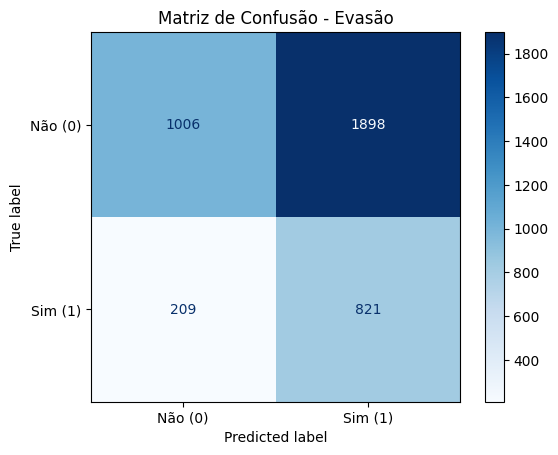

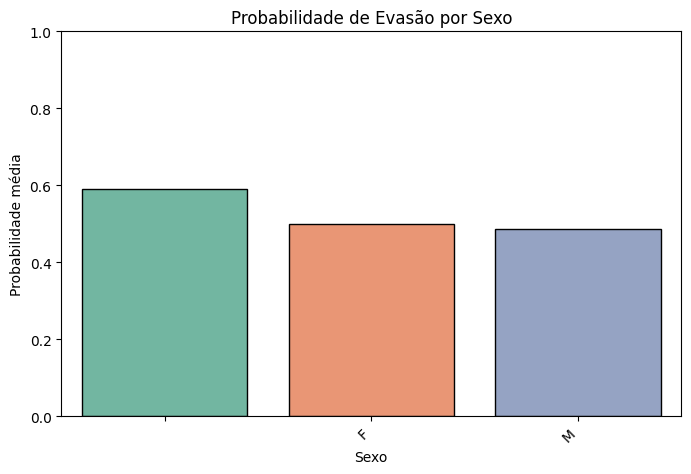

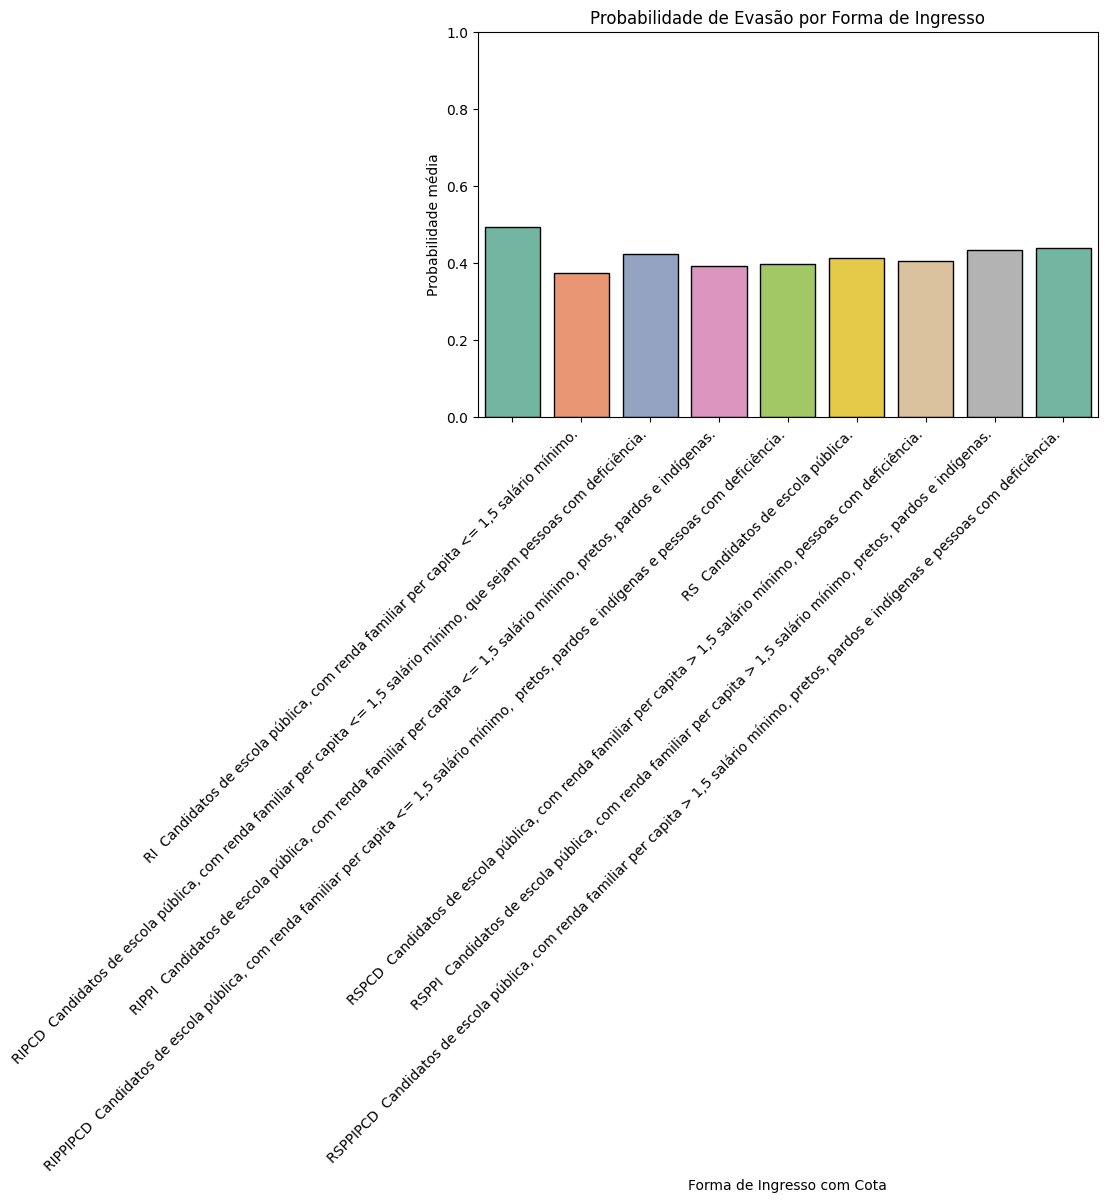

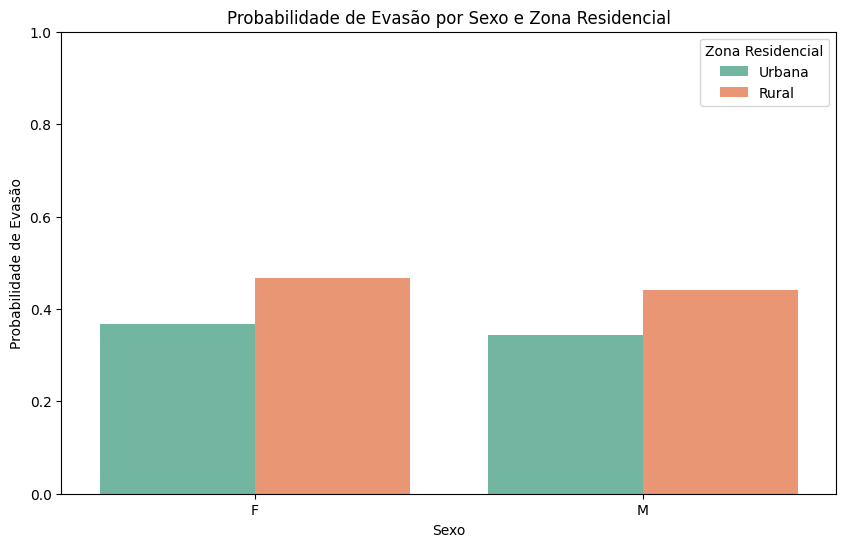


📊 Avaliação I.R.A. Alto:
Acurácia: 0.555 | Precisão: 0.370 | Recall: 0.696 | F1: 0.483
Matriz de Confusão:
 [[1367 1392]
 [ 357  818]]


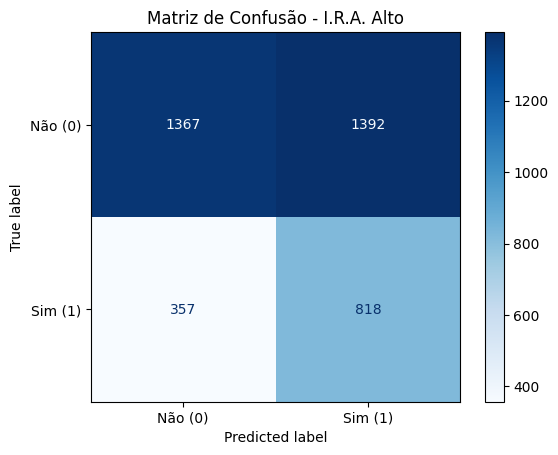

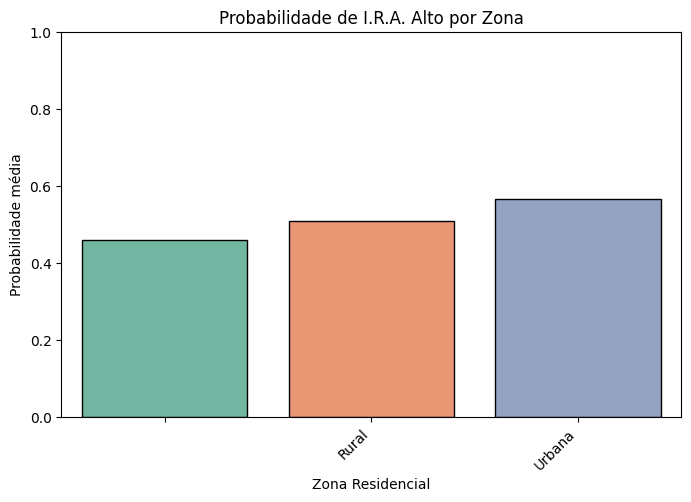

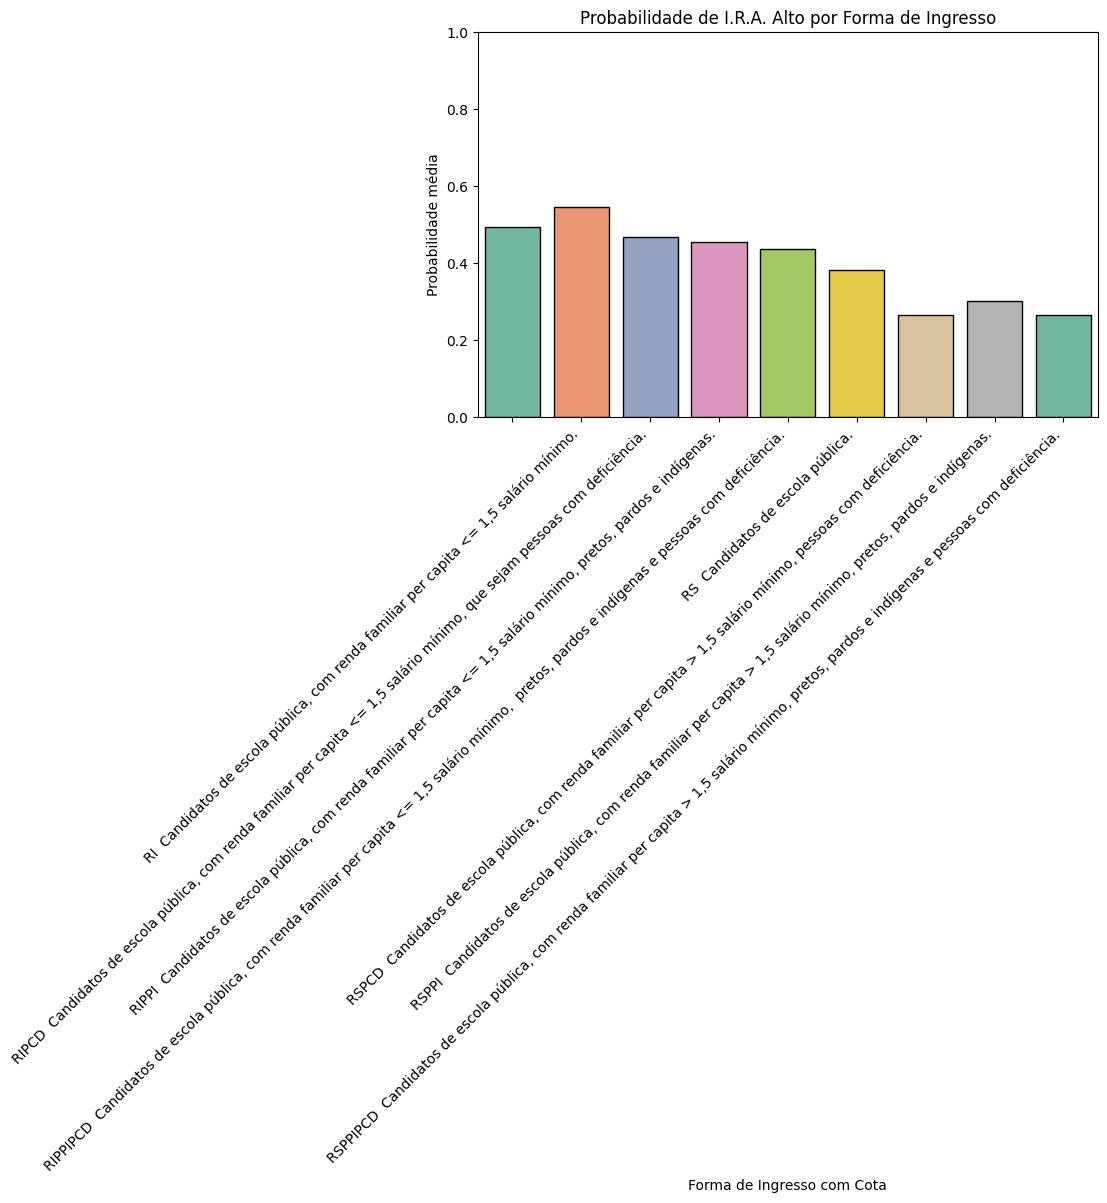

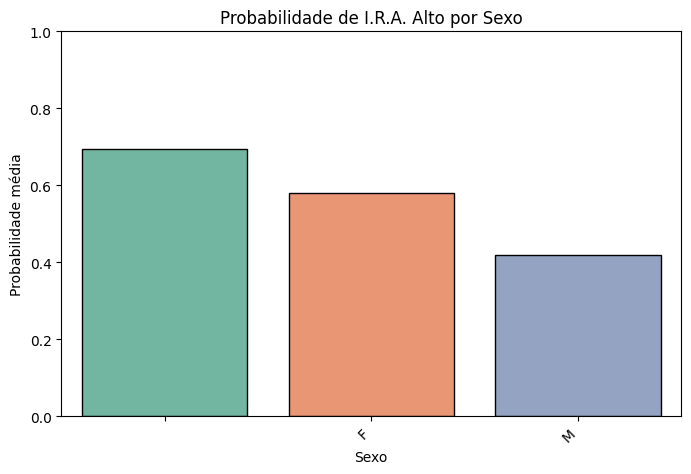


💡 Previsão interativa de probabilidade de I.R.A. alto e Evasão


KeyboardInterrupt: Interrupted by user

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# ---------------------- FUNÇÃO DE AVALIAÇÃO ----------------------
def avaliar_modelo(y_true, y_pred, nome_modelo="Modelo"):
    """
    Avalia modelo de classificação binária.
    Métricas: Acurácia, Precisão, Recall, F1-score e Matriz de Confusão
    """
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    cm = confusion_matrix(y_true, y_pred)

    print(f"\n📊 Avaliação {nome_modelo}:")
    print(f"Acurácia: {acc:.3f} | Precisão: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")
    print("Matriz de Confusão:\n", cm)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Não (0)","Sim (1)"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Matriz de Confusão - {nome_modelo}")
    plt.show()

# ---------------------- 1️⃣ CARREGAR E LIMPAR DADOS ----------------------
df = pd.read_excel("Relatorio-IF.xlsx")
df_ml = df[df["Situação no Curso"].notna()].copy()

# Cria target EVASÃO: 1 se transferido/cancelado/evadido, 0 caso contrário
evasao_labels = ["Transferido Externo", "Cancelado", "Evasão"]
df_ml["Evasao"] = df_ml["Situação no Curso"].apply(
    lambda x: 1 if any(label in str(x) for label in evasao_labels) else 0
)

# Limpa colunas categóricas: remove espaços, "-" e valores inválidos
for col in ["Sexo", "Zona Residencial", "Forma de Ingresso com Cota"]:
    if col in df_ml.columns:
        df_ml[col] = df_ml[col].astype(str).str.strip().str.replace("-", "", regex=False)
        df_ml = df_ml[(df_ml[col].notna()) & (df_ml[col] != "-") & (df_ml[col].str.upper() != "N")]

# Limpa I.R.A.: converte vírgula para ponto e transforma em número
df_ml["I.R.A."] = df_ml["I.R.A."].astype(str).str.replace(",", ".", regex=False)
df_ml["I.R.A."] = pd.to_numeric(df_ml["I.R.A."], errors="coerce")
df_ml = df_ml[df_ml["I.R.A."].notna()]
df_ml = df_ml[(df_ml["I.R.A."] >= 0) & (df_ml["I.R.A."] <= 10)]

# Cria target IRA_ALTO: 1 se I.R.A. >= 7.5
df_ml["IRA_alto"] = (df_ml["I.R.A."] >= 7.5).astype(int)

# ---------------------- 2️⃣ MODELO EVASÃO ----------------------
features_ev = ["Sexo", "Zona Residencial", "Forma de Ingresso com Cota"]
target_ev = "Evasao"

# Codifica categorias em números (ex: M→0, F→1)
le_ev = {col: LabelEncoder() for col in features_ev}
for col in features_ev:
    df_ml[col + "_enc"] = le_ev[col].fit_transform(df_ml[col])

X_ev = df_ml[[col + "_enc" for col in features_ev]]
y_ev = df_ml[target_ev]

# Divide treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X_ev, y_ev, test_size=0.2, random_state=42, stratify=y_ev)

# Normaliza dados (média=0, desvio=1)
scaler_ev = StandardScaler()
X_train_scaled = scaler_ev.fit_transform(X_train)
X_test_scaled = scaler_ev.transform(X_test)

# Treina modelo de Regressão Logística
model_ev = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
model_ev.fit(X_train_scaled, y_train)

# Avalia modelo
y_pred = model_ev.predict(X_test_scaled)
avaliar_modelo(y_test, y_pred, "Evasão")

# Calcula probabilidade de evasão para todos os alunos
df_ml["Prob_Evasao"] = model_ev.predict_proba(scaler_ev.transform(X_ev))[:, 1]

# ---------------------- 3️⃣ GRÁFICOS EVASÃO ----------------------
def plot_prob(df, prob_col, feature, title):
    """
    Plota probabilidade média por categoria.
    Agrupa dados pela feature e calcula média das probabilidades.
    """
    prob_mean = df.groupby(feature)[prob_col].mean()
    plt.figure(figsize=(8,5))
    sns.barplot(x=prob_mean.index, y=prob_mean.values, palette="Set2", edgecolor="black")
    plt.ylabel("Probabilidade média")
    plt.xlabel(feature)
    plt.title(title)
    plt.xticks(rotation=45, ha="right")
    plt.ylim(0,1)
    plt.show()

plot_prob(df_ml, "Prob_Evasao", "Sexo", "Probabilidade de Evasão por Sexo")
plot_prob(df_ml, "Prob_Evasao", "Forma de Ingresso com Cota", "Probabilidade de Evasão por Forma de Ingresso")

# Gráfico com 2 variáveis: Sexo e Zona
df_sexo_zona = df_ml[df_ml["Sexo"].isin(["M","F"]) & df_ml["Zona Residencial"].isin(["Urbana","Rural"])].copy()
plt.figure(figsize=(10,6))
sns.barplot(x='Sexo', y='Prob_Evasao', hue='Zona Residencial', data=df_sexo_zona, ci=None, palette='Set2')
plt.title("Probabilidade de Evasão por Sexo e Zona Residencial")
plt.ylabel("Probabilidade de Evasão")
plt.ylim(0, 1)
plt.legend(title='Zona Residencial')
plt.show()

# ---------------------- 4️⃣ MODELO I.R.A. ALTO ----------------------
features_ira = ["Sexo", "Zona Residencial", "Forma de Ingresso com Cota"]
target_ira = "IRA_alto"

# Codifica variáveis
le_ira = {col: LabelEncoder() for col in features_ira}
for col in features_ira:
    df_ml[col + "_enc_ira"] = le_ira[col].fit_transform(df_ml[col])

X_ira = df_ml[[col + "_enc_ira" for col in features_ira]]
y_ira = df_ml[target_ira]

# Divide e treina
X_train_ira, X_test_ira, y_train_ira, y_test_ira = train_test_split(X_ira, y_ira, test_size=0.2, random_state=42, stratify=y_ira)

model_ira = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
model_ira.fit(X_train_ira, y_train_ira)

# Avalia
y_pred_ira = model_ira.predict(X_test_ira)
avaliar_modelo(y_test_ira, y_pred_ira, "I.R.A. Alto")

# Calcula probabilidades
df_ml["Prob_IRA_alto"] = model_ira.predict_proba(X_ira)[:,1]

# ---------------------- 5️⃣ GRÁFICOS I.R.A. ----------------------
plot_prob(df_ml, "Prob_IRA_alto", "Zona Residencial", "Probabilidade de I.R.A. Alto por Zona")
plot_prob(df_ml, "Prob_IRA_alto", "Forma de Ingresso com Cota", "Probabilidade de I.R.A. Alto por Forma de Ingresso")
plot_prob(df_ml, "Prob_IRA_alto", "Sexo", "Probabilidade de I.R.A. Alto por Sexo")

# ---------------------- 6️⃣ PREDIÇÃO INTERATIVA ----------------------
print("\n💡 Previsão interativa de probabilidade de I.R.A. alto e Evasão")

def get_valid_input(prompt, le):
    """
    Recebe input do usuário e valida.
    Repete até valor válido.
    """
    while True:
        val = input(prompt).strip()
        try:
            encoded = le.transform([val])[0]
            return val, encoded
        except:
            print(f"Valor inválido! Opções: {list(le.classes_)}")

# Coleta dados do usuário
sexo_input, sexo_enc = get_valid_input("Digite o Sexo (M/F): ", le_ira["Sexo"])
zona_input, zona_enc = get_valid_input("Digite a Zona Residencial (Urbana/Rural): ", le_ira["Zona Residencial"])
cota_input, cota_enc = get_valid_input("Digite a Forma de Ingresso com Cota: ", le_ira["Forma de Ingresso com Cota"])

# Prepara entrada e faz predições
X_novo = np.array([[sexo_enc, zona_enc, cota_enc]])

prob_ira = model_ira.predict_proba(X_novo)[0,1]
prob_evasao = model_ev.predict_proba(scaler_ev.transform(X_novo))[0,1]

# Exibe resultados
print(f"\n🔹 Probabilidade de I.R.A. alto: {prob_ira:.2f}")
print(f"🔹 Probabilidade de Evasão: {prob_evasao:.2f}")